In [19]:

import pyide
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

In [4]:
#Direct input 
plt.rcParams['text.latex.preamble']=r"\usepackage{lmodern}"
#Options
params = {'text.usetex' : True,
          'font.size' : 11,
          #'font.family' : 'lmodern',
          #'text.latex.unicode': True,
          }
plt.rcParams.update(params) 

4

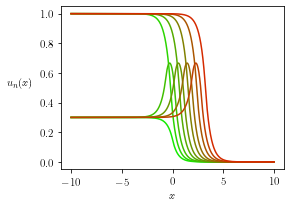

In [20]:
filename ='fig3' #without extension
fig_size_x=4
fig_size_y=3


from imp import reload # for debugging
alpha=0.2
beta=0.8
mu=0.3

H = lambda x : np.heaviside(x, 1)

g = lambda x : H(x-alpha) - (1-mu)*H(x-beta)

import matplotlib.pyplot as plt

U = np.arange(0, 1, 0.01)
k = lambda x: 1/2 * np.exp(-np.abs(x))

model = pyide.IDEModel(growthFunction=pyide.GrowthFunction(g),
                  dispersalKernel=pyide.DisperalKernel(k))
                  
                
sim = pyide.IDESimulation(model)
sim.setDomain(xmin=-10, xmax=10, dx=0.01)
sim.setInitialCondition(lambda x : H(-x))
sim.setBoundaryCondition('static')

n = 11
sim.run(n)
#sim.plot(times=np.arange(1, n), file='fig3.pdf')

times = np.arange(1, n)
X = sim.domain
U_seq = sim.timeSeries
T = len(U_seq)

fig,axs = plt.subplots()

for t in times:
    U = U_seq[t]
    axs.plot(X, U, color=(t/T,1-t/T,0))
    
axs.set_xlabel('$x$')
axs.set_ylabel('$u_n(x)$', rotation=0, labelpad=20)



#import matplotlib.pyplot as plt
#import matplotlib as mpl

#fig, ax = plt.subplots(figsize=(6, 1))
#fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.cool
#norm = mpl.colors.Normalize(vmin=5, vmax=10)

#cb1 = matplotlib.colorbar.ColorbarBase(axs, cmap=matplotlib.cm.cool)
                                #norm=norm,
                                #orientation='horizontal')
#cb1.set_label('Some Units')
#fig.show()


fig.set_size_inches(fig_size_x,fig_size_y)
dpi = 1000
plt.savefig(filename+'.pdf', 
            #This is simple recomendation for publication plots
            dpi=dpi, 
            # Plot will be occupy a maximum of available space
            bbox_inches='tight', 
            )

n = dpi * fig_size_x
os.system('convert -resize '+str(n)+' '+filename+'.pdf '+filename+'.png')